IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032100   0.017081   -0.399284   0.134398         78.0         96.0   
1    -0.032346   0.017054   -0.400010   0.134356        102.0         80.0   
2    -0.032590   0.017026   -0.400594   0.134314         98.0         79.0   
3    -0.032832   0.016999   -0.401113   0.134271        102.0         71.0   
4    -0.033265   0.017017   -0.412325   0.134447        102.0         87.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.048472   0.006254   -0.082119   0.092673          0.0        119.0   
1345 -0.048289   0.006253   -0.081993   0.092571          0.0        118.0   
1346 -0.048212   0.006240   -0.075446   0.092463          0.0        119.0   
1347 -0.048179   0.006225   -0.068067   0.092367          0.0        130.0   
1348 -0.048194   0.006211   -0.061448   0.092295          0.0        113.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [6]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [7]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.026384   0.060718    1.577281   0.247549         95.0        121.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340   16.076235    8.890075 -0.039243   0.033415  ...      10124.700219   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.881828          0.242896          -0.574502          3.912921   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               172.0               171.0          71.883439   

     amp2(Curr(ESC_5))  Guasto  
340          19.491861       2  

[1 rows x 167 columns]


In [8]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [9]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032100   0.017081   -0.399284   0.134398         78.0         96.0   
1    -0.032346   0.017054   -0.400010   0.134356        102.0         80.0   
2    -0.032590   0.017026   -0.400594   0.134314         98.0         79.0   
3    -0.032832   0.016999   -0.401113   0.134271        102.0         71.0   
4    -0.033265   0.017017   -0.412325   0.134447        102.0         87.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.048472   0.006254   -0.082119   0.092673          0.0        119.0   
1345 -0.048289   0.006253   -0.081993   0.092571          0.0        118.0   
1346 -0.048212   0.006240   -0.075446   0.092463          0.0        119.0   
1347 -0.048179   0.006225   -0.068067   0.092367          0.0        130.0   
1348 -0.048194   0.006211   -0.061448   0.092295          0.0        113.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [10]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [11]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.032100   0.017081   -0.399284   0.134398    78.000000    96.000000   
1    -0.032346   0.017054   -0.400010   0.134356   102.000000    80.000000   
2    -0.032590   0.017026   -0.400594   0.134314    98.000000    79.000000   
3    -0.032832   0.016999   -0.401113   0.134271   102.000000    71.000000   
4    -0.033265   0.017017   -0.412325   0.134447   102.000000    87.000000   
...        ...        ...         ...        ...          ...          ...   
1615 -0.140665   0.039432   -1.463941   0.243150    80.695492    79.695492   
1616 -0.116927   0.039892   -0.468771   0.231208    57.517507    78.690009   
1617 -0.032218   0.010018    2.007535   0.105031    72.810206    97.334288   
1618 -0.011144   0.011947    2.132984   0.109730    60.068149    80.637026   
1619 -0.004310   0.011618    2.592661   0.107728    60.000000    77.000000   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x0000025706BFD120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True False  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [13]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.305966
28         freq1(AccX)  3.483287
12         freq1(GyrY)  3.181454
11           RMS(GyrY)  2.796501
93   freq2(RPM(ESC_1))  2.727878
92   freq1(RPM(ESC_1))  2.710150
9            var(GyrY)  2.657021
153   kurt(RPM(ESC_5))  2.549797
14          amp1(GyrY)  2.411336
159   var(Curr(ESC_5))  2.054591
104     <>(RPM(ESC_2))  2.013277
8             <>(GyrY)  1.865754
78    amp1(RPM(ESC_0))  1.719106
152    var(RPM(ESC_5))  1.715133
107    RMS(RPM(ESC_2))  1.712199
22          amp1(GyrZ)  1.644448
32            <>(AccY)  1.611300
62         amp1(Pitch)  1.254590
17           var(GyrZ)  1.057752
80     <>(Curr(ESC_0))  1.055152
30          amp1(AccX)  1.023502
19           RMS(GyrZ)  0.989068
76   freq1(RPM(ESC_0))  0.958506
4          freq1(GyrX)  0.930116
57          var(Pitch)  0.893975
77   freq2(RPM(ESC_0))  0.795015
156   amp1(RPM(ESC_5))  0.784386
83    RMS(Curr(ESC_0))  0.657867
97    var(Curr(ESC_1))  0.634818
15        

In [14]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [15]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.032100   0.017081    78.000000 -0.014483   0.028038   0.167832   
1    -0.032346   0.017054   102.000000 -0.014131   0.028001   0.167695   
2    -0.032590   0.017026    98.000000 -0.013642   0.028006   0.167669   
3    -0.032832   0.016999   102.000000 -0.013156   0.028010   0.167644   
4    -0.033265   0.017017   102.000000 -0.013003   0.027940   0.167422   
...        ...        ...          ...       ...        ...        ...   
1615 -0.140665   0.039432    80.695492  0.026051   0.008725   0.096863   
1616 -0.116927   0.039892    57.517507  0.045478   0.010433   0.111685   
1617 -0.032218   0.010018    72.810206 -0.009471   0.006007   0.077984   
1618 -0.011144   0.011947    60.068149  0.061103   0.010965   0.121125   
1619 -0.004310   0.011618    60.000000  0.064808   0.011248   0.124171   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  RMS(RPM(ESC_2))  \
0        0.000000   30.934448    

In [16]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.026384   0.060718         95.0 -0.039243   0.033415   0.186767   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  RMS(RPM(ESC_2))  \
340          0.0    15.95838    8.050098   0.017186  ...      5351.385837   

     freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340              100.0               99.0         -0.901573   

     kurt(Curr(ESC_4))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  \
340          -1.469387    468885.791658          0.000428      11341.412155   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  
340         3.881828          0.242896  

[1 rows x 40 columns]


In [17]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  \
0    -0.032100   0.017081    78.000000 -0.014483   0.014169   0.197959   
1    -0.032346   0.017054   102.000000 -0.014131   0.014150   0.197715   
2    -0.032590   0.017026    98.000000 -0.013642   0.014126   0.197485   
3    -0.032832   0.016999   102.000000 -0.013156   0.014101   0.197256   
4    -0.033265   0.017017   102.000000 -0.013003   0.014082   0.197016   
...        ...        ...          ...       ...        ...        ...   
1615 -0.140665   0.039432    80.695492  0.026051   0.005552   0.149610   
1616 -0.116927   0.039892    57.517507  0.045478   0.004470   0.129581   
1617 -0.032218   0.010018    72.810206 -0.009471   0.004390   0.110124   
1618 -0.011144   0.011947    60.068149  0.061103   0.005118   0.108458   
1619 -0.004310   0.011618    60.000000  0.064808   0.004534   0.110907   

      amp1(GyrZ)  var(Curr(ESC_0))  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
0       1.463315          0.207026     

In [18]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  \
340 -0.026384   0.060718         95.0 -0.039243   0.017186   0.208906   

     amp1(GyrZ)  var(Curr(ESC_0))  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
340    0.659428          0.353779          0.985391     5232.414097   

     kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  kurt(RPM(ESC_5))  
340         -0.901573          -1.469387          0.000428  


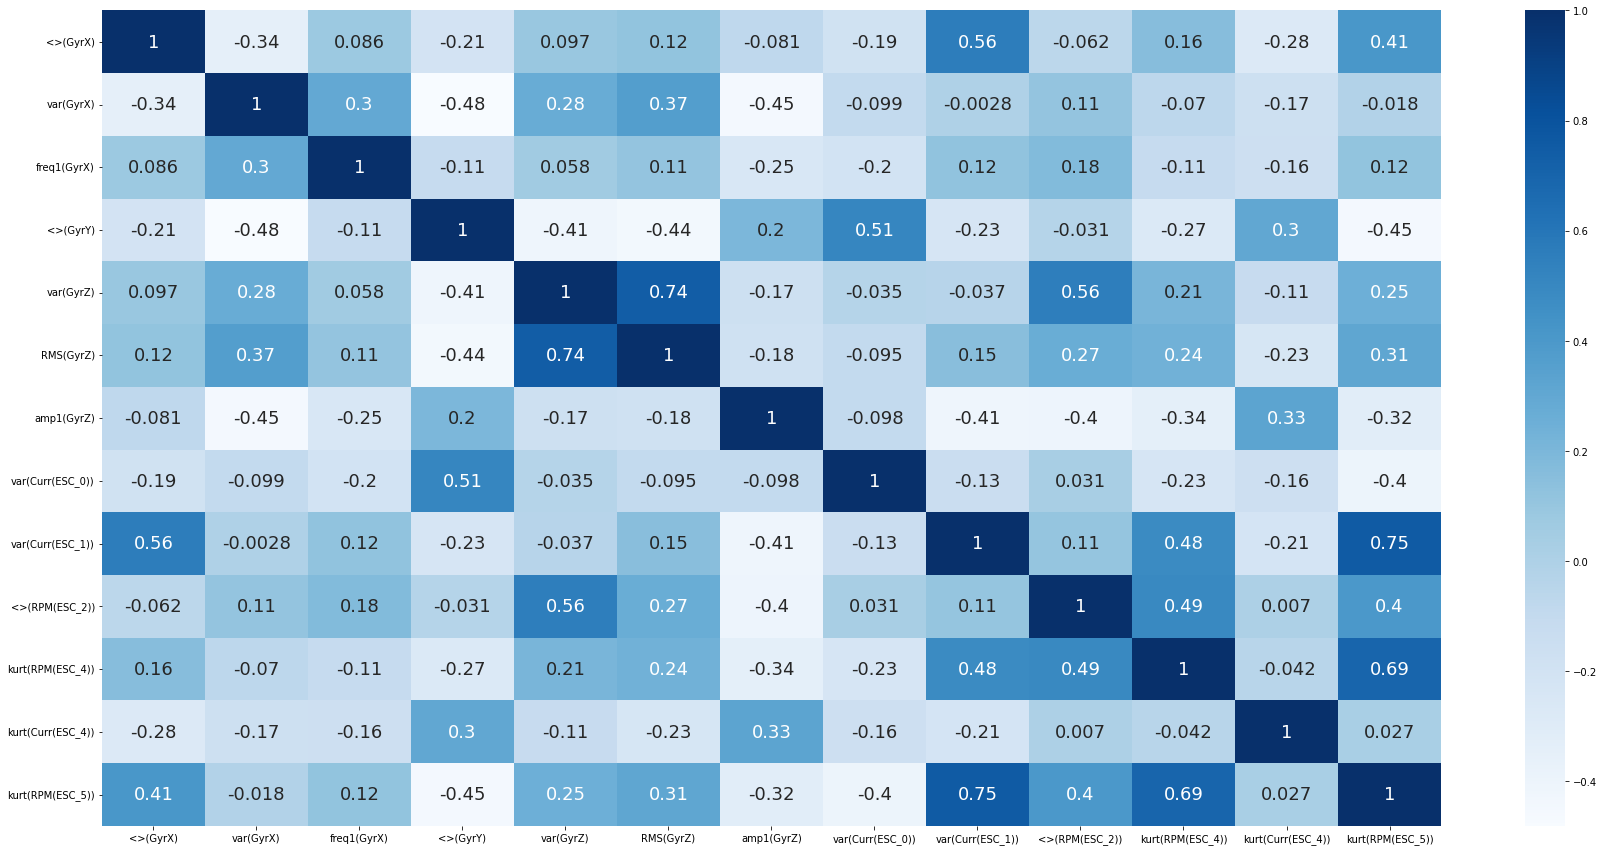

In [19]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [20]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 13)
(324, 13)
(1296, 1)
(324, 1)


In [21]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [22]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.86153846 0.84169884 0.81081081 0.84942085 0.8030888 ]
Accuracy: 0.83 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.66153846 0.64092664 0.65637066 0.62162162 0.66023166]
Accuracy: 0.68 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.54230769 0.56370656 0.32818533 0.38610039 0.56370656]
Accuracy: 0.52 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.33461538 0.35135135 0.44015444 0.50579151 0.43243243]
Accuracy: 0.52 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

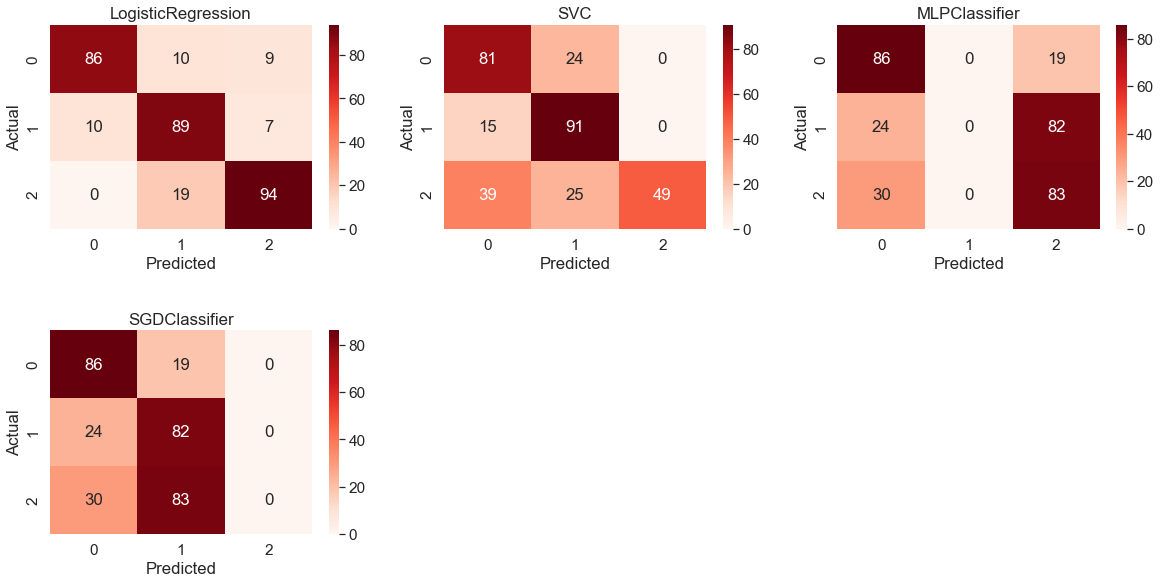

In [23]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Scores

Text(0.5, 1.0, 'Cross validation scores')

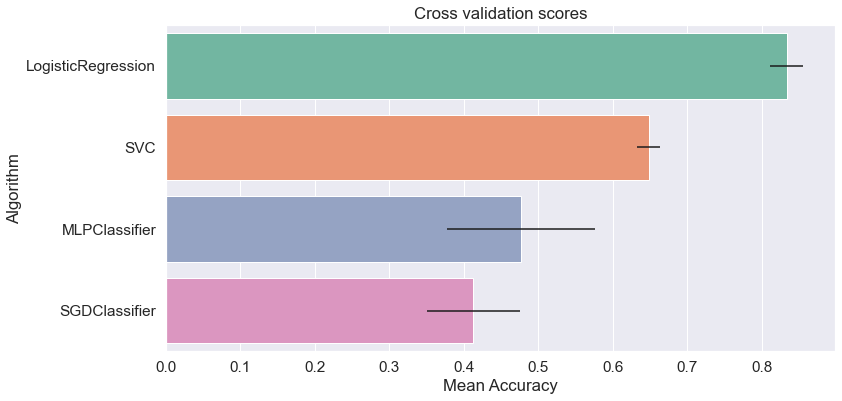

In [24]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [25]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       105
           1       0.75      0.84      0.79       106
           2       0.85      0.83      0.84       113

    accuracy                           0.83       324
   macro avg       0.83      0.83      0.83       324
weighted avg       0.84      0.83      0.83       324

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.77      0.68       105
           1       0.65      0.86      0.74       106
           2       1.00      0.43      0.60       113

    accuracy                           0.68       324
   macro avg       0.75      0.69      0.67       324
weighted avg       0.76      0.68      0.67       324

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.82      0.70       105
           1       0.00